# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [104]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
import seaborn as sns
import numpy as np
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Mengimpor MinMaxScaler dan StandardScaler untuk normalisasi dan standardisasi
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [105]:
# Memuat dataset transaksi bank dan menampilkan 5 baris pertama
bank_df = pd.read_csv(r'C:\Users\Dell\Desktop\DICODING\Python\proyek_ml\bank_transactions.csv')

# Memuat data mentah untuk visualisasi
raw_data = bank_df.copy()

bank_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,4/11/2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,11/4/2024 8:08
1,TX000002,AC00455,376.24,6/27/2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,11/4/2024 8:09
2,TX000003,AC00019,126.29,7/10/2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,11/4/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,11/4/2024 8:09
4,TX000005,AC00411,13.45,10/16/2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,11/4/2024 8:06


**Insight**
- TransactionID: ID unik untuk setiap transaksi
- AccountID: ID unik setiap akun, dengan banyak transaksi pada masing-masing akun
- TransactionAmount: Jumlah uang (dolar) setiap transaksi, bisa berupa pengeluaran kecil sehari-hari hingga pembelian dalam jumlah besar
- TransactionDate: Waktu dan tanggal ketika transaksi dilakukan
- TransactionType: Jenis transaksi yang dapat berupa Credit atau Debit
- Location: Lokasi geografis tempat transaksi terjadi, direpresentasikan dalam nama kota di AS
- DeviceID: ID unik untuk perangkat yang digunakan dalam transaksi
- IP Address: Alamat IP yang digunakan dalam transaksi, beberapa akun mungkin mengalami perubahan dari waktu ke waktu
- MerchantID: Identifikasi unik untuk pedagang/tempat transaksi terjadi, menunjukkan pola belanja normal dan transaksi tidak biasa untuk suatu akun
- Channel: Metode yang digunakan untuk melakukan transaksi, seperti Online, ATM, atau Branch (kantor cabang)
- CustomerAge: Usia pemilik akun, dikelompokkan secara logis berdasarkan profesi
- CustomerOccupation: Profesi pemilik akun (Doctor, Engineer, Student, Retired), yang mencerminkan pola pendapatan
- TransactionDuration: Durasi transaksi dalam hitungan detik, bervariasi tergantung pada jenis transaksi
- LoginAttempts: Jumlah upaya login sebelum transaksi berhasil
- AccountBalance: Saldo akun (dolar) setelah transaksi dilakukan, berubah sesuai jenis dan jumlah transaksi
- PreviousTransactionDate: Waktu dan tanggal transaksi terakhir pada akun, untung menghitung frekuensi transaksi

# **4. Exploratory Data Analysis (EDA)**

## **a. Memahami Struktur Data**

In [106]:
# Menampilkan informasi tentang dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

**Insight**
- Terdapat 2512 baris dan 16 kolom
- Terdapat 11 kolom kategorik dan 5 kolom numerik
- Tidak terdapat missing value

## **b. Menganalisis Distribusi dan Korelasi Data**

In [107]:
# Menampilkan statistik deskriptif
bank_df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Insight**
- TransactionAmount: Terdiri dari 2512 transaksi, dengan transaksi terkecil sebesar 0.26 dolar dan terbesar 1919.11 dolar
- CustomerAge: Usia pemilik akun berkisar antara 18 hingga 80 tahun dengan rata-rata 44 sampai 45 tahun. Sebagian besar pemilik akun berada pada rentang usia 27 hingga 59 tahun
- TransactionDuration: Durasi transaksi berkisar antara 10 sampai 300 detik dengan rata-rata 119.64 detik. Sebagian besar transaksi dilakukan selama 63 sampai 161 detik
- LoginAttempts: Sebagian besar upaya login dilakukan hanya 1 kali, namun terdapat upaya tertinggi sebanyak 5 kali
- AccountBalance: Saldo akun bervariasi antara 101.25 dolar sampai 14977.99 dolar dengan rata-rata 5114.3

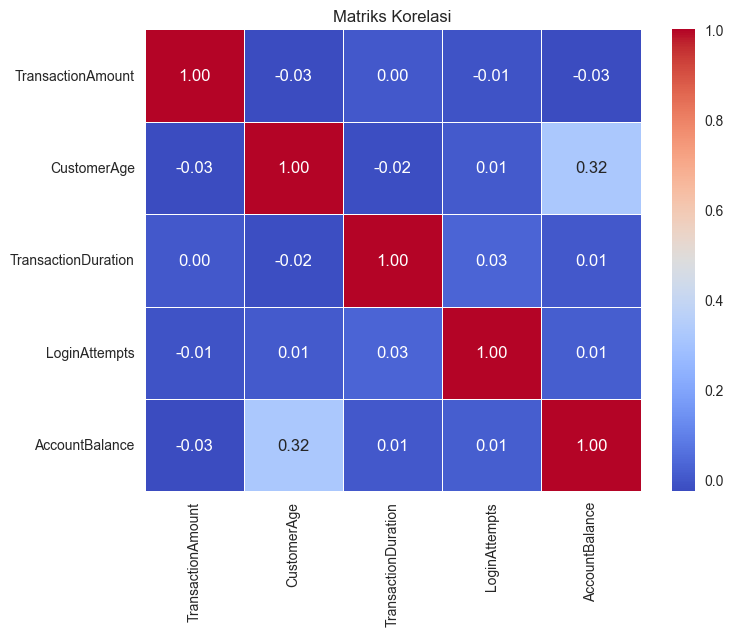

In [108]:
# Menghitung matriks korelasi untuk kolom numerik
fitur_num = bank_df.select_dtypes(include=['number'])
matriks_korelasi = fitur_num.corr()

# Visualisasi dengan Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matriks_korelasi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

**Insight**  
Antar 5 fitur numerik tidak ada yang menunjukkan korelasi yang berarti, CustomerAge dan AccountBalance memiliki hubungan positif namun sangat lemah

## **c. Visualisasi Data**

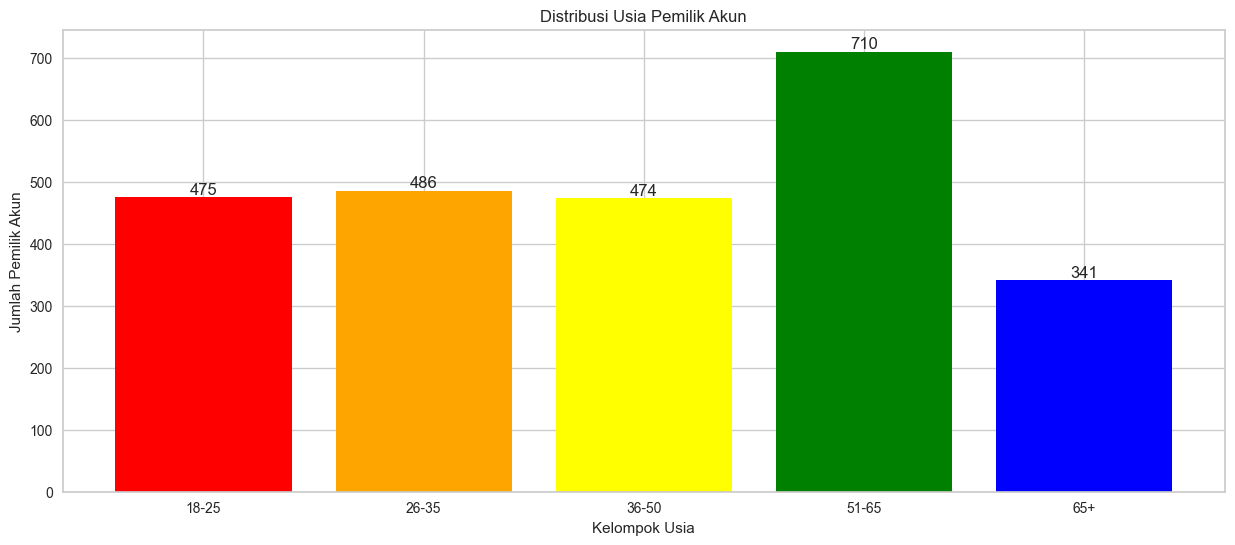

In [109]:
# Mengelompokkan usia pemilik akun ke dalam kategori dan jumlah pemilik akun di setiap kategori
age18_25 = bank_df.CustomerAge[(bank_df.CustomerAge >= 18) & (bank_df.CustomerAge <=25)]
age26_35 = bank_df.CustomerAge[(bank_df.CustomerAge >= 26) & (bank_df.CustomerAge <=35)]
age36_50 = bank_df.CustomerAge[(bank_df.CustomerAge >= 36) & (bank_df.CustomerAge <=50)]
age51_65 = bank_df.CustomerAge[(bank_df.CustomerAge >= 51) & (bank_df.CustomerAge <=65)] 
age65above = bank_df.CustomerAge[bank_df.CustomerAge > 66]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-50", "51-65", "65+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_50.values), len(age51_65.values), len(age65above.values)]

# Membuat bar chart 
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'orange', 'yellow', 'green', 'blue'])
plt.title("Distribusi Usia Pemilik Akun")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Pemilik Akun")

# Menambahkan label jumlah pelanggan diatas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

**Insight**
- 18-25 tahun: terdapat 475 pemilik akun dalam rentang usia ini
- 26-35 tahun: terdapat 486 pemilik akun dalam rentang usia ini
- 35-50 tahun: terdapat 474 pemilik akun dalam rentang usia ini
- 51-65 tahun: rentang usia ini memiliki jumlah pemilik akun terbanyak, yaitu 710 pemilik akun
- 65 tahun ke atas: rentang usia ini memiliki jumlah pemilik akun paling sedikit, yaitu 341 pemilik akun

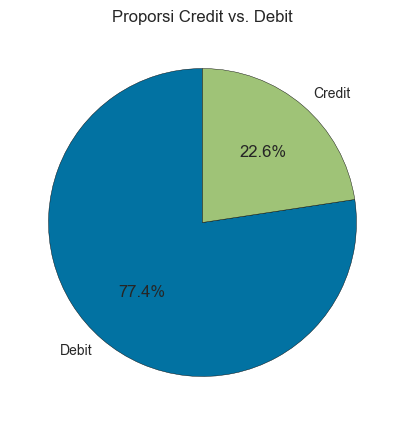

In [110]:
# Menghitung proporsi transaksi Credit dan Debit
transaction_counts = bank_df['TransactionType'].value_counts()

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(transaction_counts, labels=transaction_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proporsi Credit vs. Debit')
plt.show()

**Insight**  
Persentase penggunaan Debit dalam melakukan transaksi lebih besar dibandingkan Credit, dengan proporsi sebesar 77.4% untuk Debit dan 22.6% untuk Credit

# **5. Data Preprocessing**

## **a. Konversi Tipe Data**

In [111]:
# Konversi tanggal menjadi tipe data datetime
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'])
bank_df['PreviousTransactionDate'] = pd.to_datetime(bank_df['PreviousTransactionDate'])

## **b. Deteksi Data Duplikat**

In [112]:
print("Jumlah duplikasi: ", bank_df.duplicated().sum())

Jumlah duplikasi:  0


## **c. Deteksi dan Penanganan Outlier**

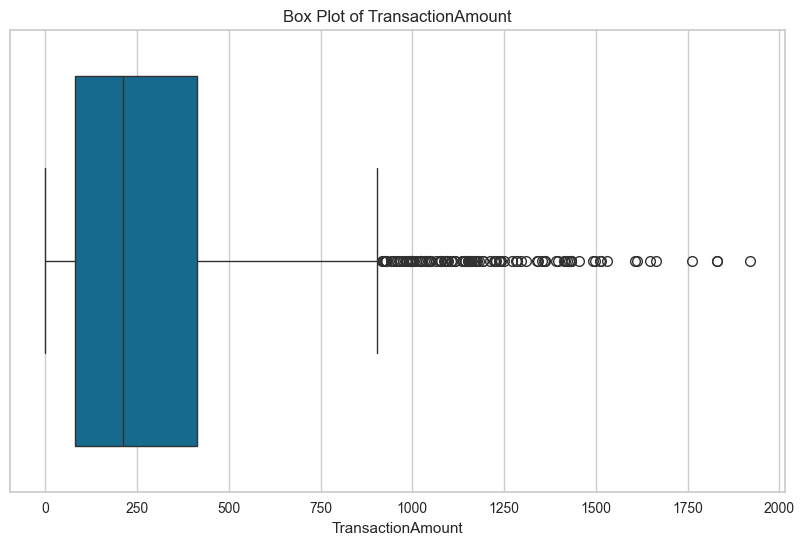

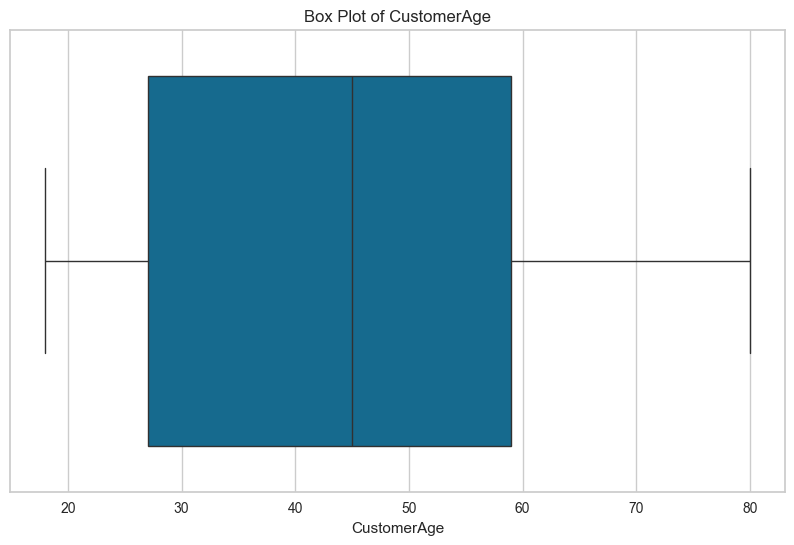

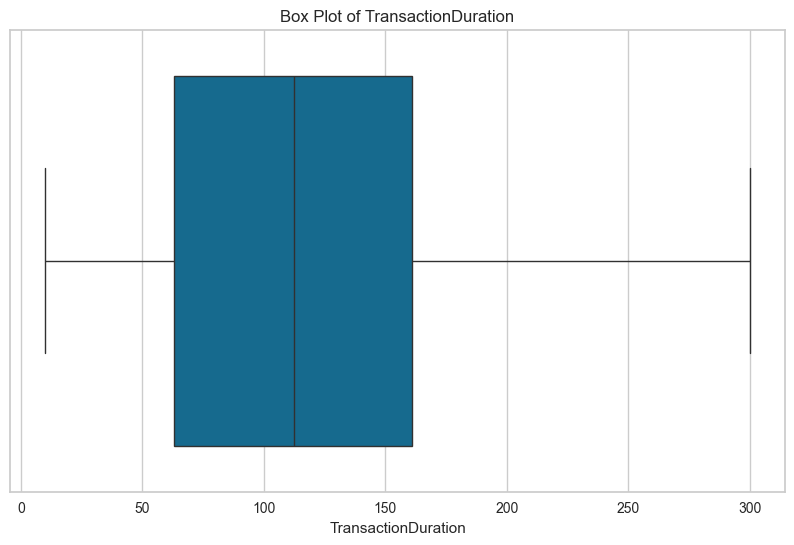

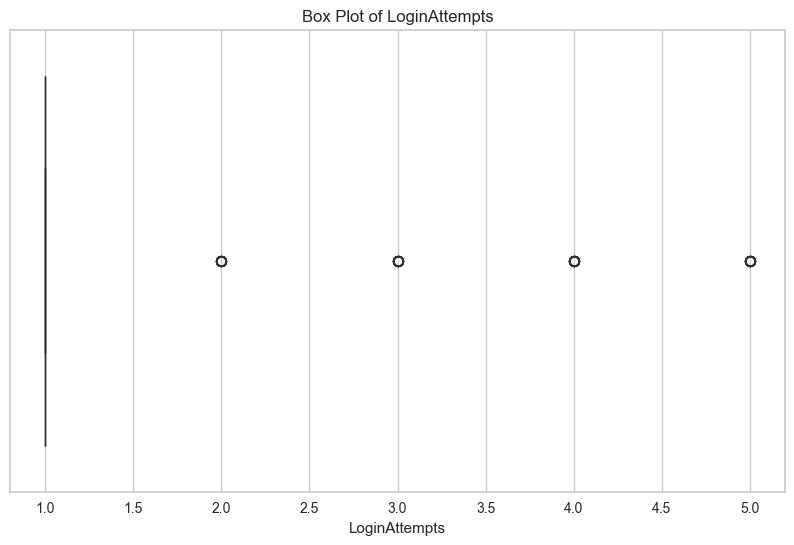

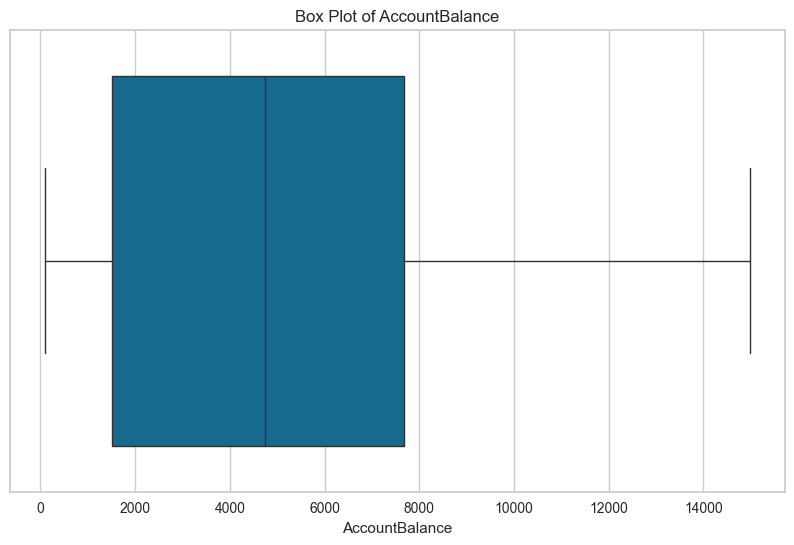

In [113]:
# Deteksi Outlier
for feature in fitur_num:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=bank_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


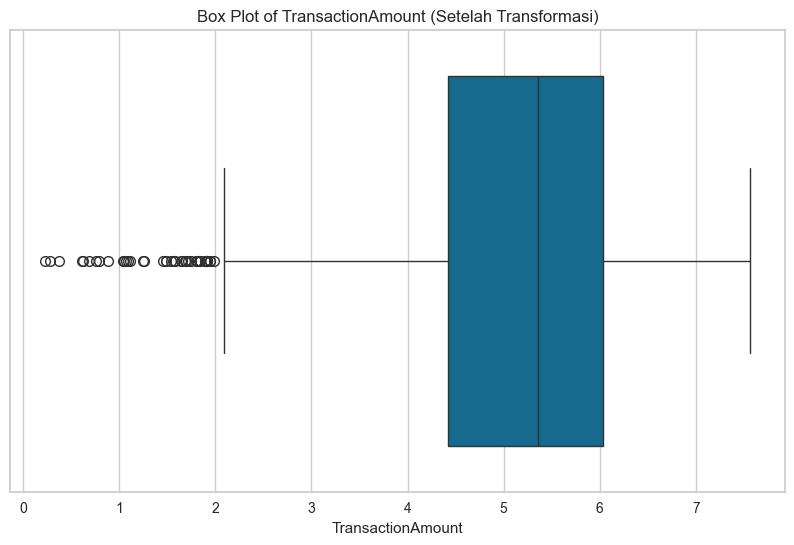

Jumlah Outlier setelah Transformasi Log untuk TransactionAmount: 44


In [114]:
# Penanganan Outlier dengan Transformasi log
bank_df["TransactionAmount"] = np.log1p(bank_df["TransactionAmount"])

# Menampilkan boxplot setelah transformasi
plt.figure(figsize=(10, 6))
sns.boxplot(x=bank_df['TransactionAmount'])
plt.title('Box Plot of TransactionAmount (Setelah Transformasi)')
plt.show()

# Hitung ulang IQR setelah transformasi log
Q1_log = bank_df["TransactionAmount"].quantile(0.25)
Q3_log = bank_df["TransactionAmount"].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Hitung batas bawah dan atas untuk outlier
lower_bound_log = Q1_log - 1.5 * IQR_log
upper_bound_log = Q3_log + 1.5 * IQR_log

# Deteksi outlier setelah transformasi log
outliers_log = ((bank_df["TransactionAmount"] < lower_bound_log) |
                (bank_df["TransactionAmount"] > upper_bound_log)).sum()

print(f"Jumlah Outlier setelah Transformasi Log untuk TransactionAmount: {outliers_log}")

**Insight**
- Fitur TransactionAmount memiliki banyak outlier, dan harus ditangani
- Sedangkan LoginAttempts tidak memiliki banyak outlier, dan tidak perlu ditangani karena akan merupakan fitur penting

## **d. Standarisasi Fitur Numerik**

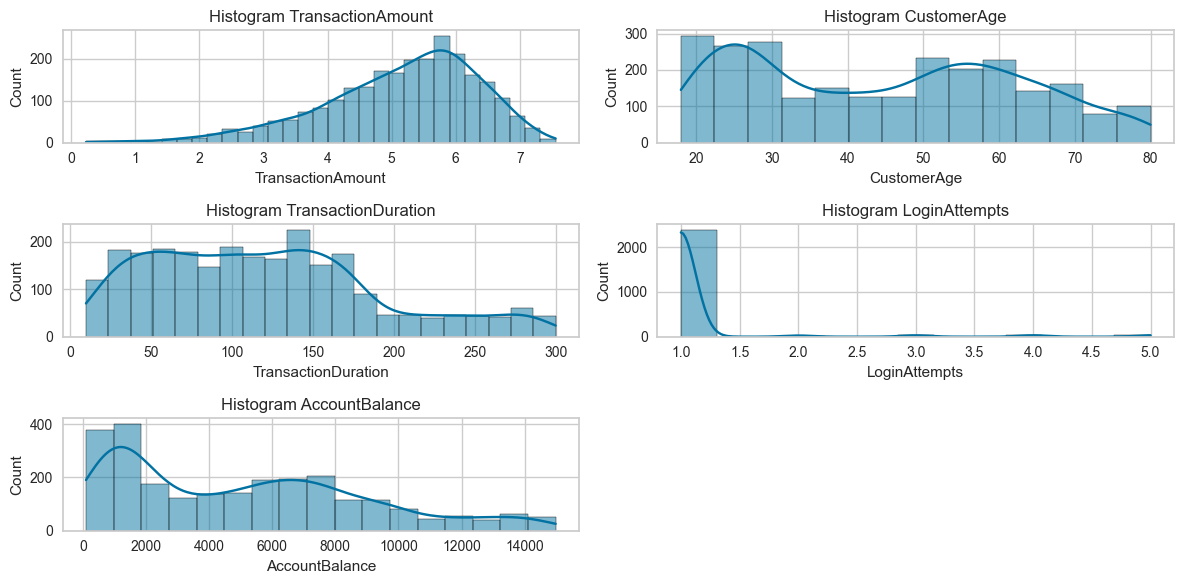

In [115]:
# Histogram Sebelum Standardisasi
fitur_num = bank_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(fitur_num, 1):
    plt.subplot(len(fitur_num) // 2 + 1, 2, i)
    sns.histplot(bank_df[col], kde=True)
    plt.title(f"Histogram {col}")

plt.tight_layout()
plt.show()

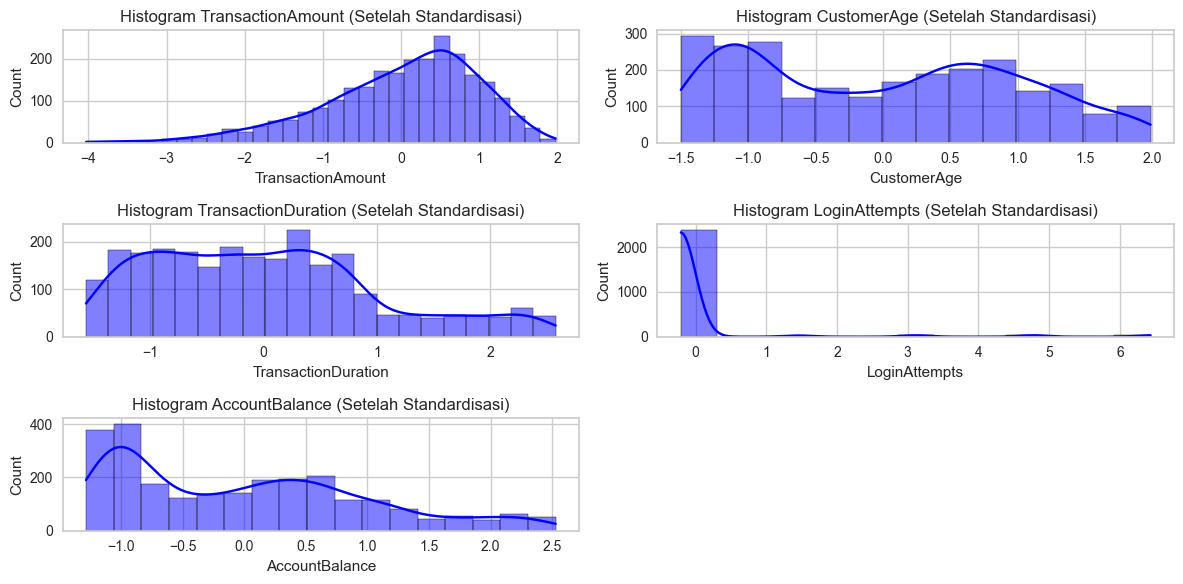

In [116]:
# List fitur yang ingin distandarisasi
fitur_standardisasi = fitur_num

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi data (hasilnya array)
scaled_values = scaler.fit_transform(bank_df[fitur_standardisasi])

# Mengembalikan hasil ke DataFrame
bank_df[fitur_standardisasi] = pd.DataFrame(scaled_values, columns=fitur_standardisasi, index=bank_df.index)

# Plot histogram untuk setiap fitur
plt.figure(figsize=(12, 6))
for i, col in enumerate(fitur_standardisasi, 1):
    plt.subplot(len(fitur_standardisasi) // 2 + 1, 2, i)
    sns.histplot(bank_df[col], kde=True, color='blue')
    plt.title(f"Histogram {col} (Setelah Standardisasi)")

plt.tight_layout()
plt.show()

## **e. Drop Fitur yang Tidak Relevan**

In [117]:
bank_df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate'], inplace=True)

## **f. Encoding Fitur Kategorik**

In [118]:
# Label Encoding
label_encoders = {}  # Dictionary untuk menyimpan encoder setiap kolom

for column in bank_df.columns:
    if bank_df[column].dtype == 'object':
        le = LabelEncoder()
        bank_df[column] = le.fit_transform(bank_df[column])  # Encoding
        label_encoders[column] = le  # Simpan encoder untuk inverse nanti

bank_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.994061,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.646895,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.244470,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,0.064507,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-2.029619,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


In [119]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   float64
 5   CustomerOccupation   2512 non-null   int64  
 6   TransactionDuration  2512 non-null   float64
 7   LoginAttempts        2512 non-null   float64
 8   AccountBalance       2512 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 176.8 KB


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [120]:
X = bank_df[fitur_standardisasi].values

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Analisis karakteristik setiap cluster
print("\nJumlah anggota di tiap cluster:")
print(pd.Series(labels).value_counts())


Jumlah anggota di tiap cluster:
1    1119
3     784
0     514
2      95
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

In [121]:
# Menghitung silhouette score untuk model diatas
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.23377336025434062


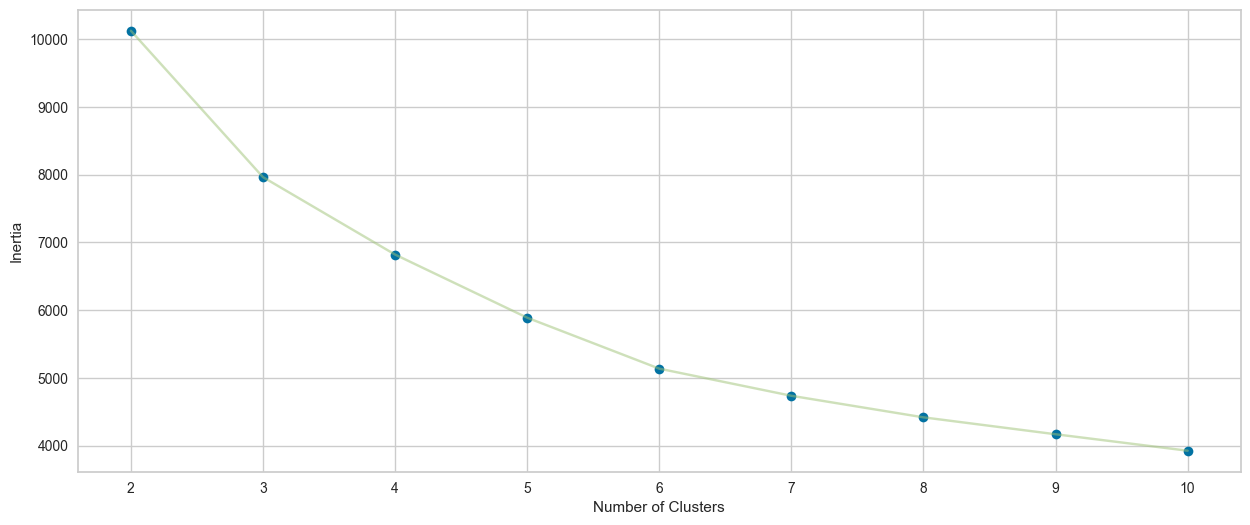

Silhouette Score untuk 2 cluster: 0.2177
Silhouette Score untuk 3 cluster: 0.2407
Silhouette Score untuk 4 cluster: 0.2338
Silhouette Score untuk 5 cluster: 0.2391
Silhouette Score untuk 6 cluster: 0.2507
Silhouette Score untuk 7 cluster: 0.2271
Silhouette Score untuk 8 cluster: 0.2266
Silhouette Score untuk 9 cluster: 0.2282
Silhouette Score untuk 10 cluster: 0.2266


In [122]:
# Menentukan jumlah cluster optimal dengan Elbow Method

inertia = []
for n in range(2 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Menghitung Silhouette Score untuk setiap jumlah cluster dari 2 hingga 10
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

**Insight**
- Dengan Elbow Method, jumlah cluster optimal adalah 3 cluster
- Dengan Silhouette Score, 3 dan 6 cluster memiliki skor yang tinggi
- Maka dengan menggabungkan kedua metode, cluster optimal yang digunakan adalah 3 cluster

## **c. Feature Selection (Opsional)**

In [123]:
# Model dasar untuk RFE
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Misal pilih 5 fitur terbaik
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, labels)

# Ambil fitur terpilih
selected_features =np.array(fitur_standardisasi)[rfe.support_]
print("Fitur terpilih oleh RFE:", selected_features)

Fitur terpilih oleh RFE: ['TransactionAmount' 'CustomerAge' 'TransactionDuration' 'LoginAttempts'
 'AccountBalance']


In [124]:
# Clustering pakai fitur hasil RFE
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Cek Silhouette Score
score = silhouette_score(bank_df[selected_features], cluster_labels)
print(f'Silhouette Score setelah RFE: {score:.4f}')

Silhouette Score setelah RFE: 0.2410


In [125]:
# Menggunakan polinomial
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(bank_df[selected_features])

# Menggunakan PCA untuk reduksi fitur
pca = PCA(n_components=3)  
X_pca_poly = pca.fit_transform(X_poly)

# Step 3: Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
final_labels = kmeans.fit_predict(X_pca_poly)

# Step 4: Evaluasi
sil_score = silhouette_score(X_pca_poly, final_labels)
print(f"Final Silhouette Score : {sil_score:.4f}")

Final Silhouette Score : 0.9655


## **d. Visualisasi Hasil Clustering**

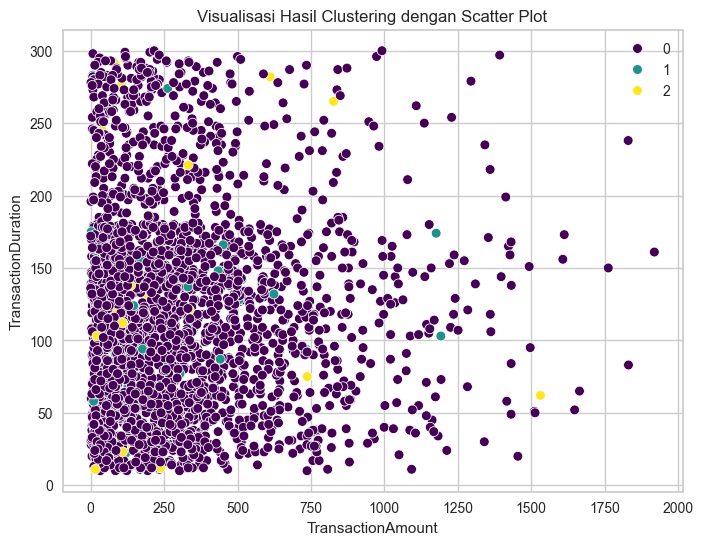

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=raw_data['TransactionAmount'], 
    y=raw_data['TransactionDuration'], hue=final_labels, palette='viridis', s=50)
plt.title('Visualisasi Hasil Clustering dengan Scatter Plot')
plt.xlabel('TransactionAmount')
plt.ylabel('TransactionDuration')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [127]:
# Type your code here
bank_df['Cluster'] = final_labels

bank_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-1.994061,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,0
1,0.646895,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.244470,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,0
3,0.064507,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,0
4,-2.029619,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [128]:
# Melakukan inverse data yang sebelumnya distandardisasi
bank_df[fitur_standardisasi] = scaler.inverse_transform(bank_df[fitur_standardisasi])

In [129]:
# Mengembalikan Log Transformasi 
bank_df["TransactionAmount"] = np.exp(bank_df["TransactionAmount"])

In [130]:
# Melakukan inverse data yang sebelumnya diencoding
for column in label_encoders:  # Menggunakan encoder yang sudah disimpan
    bank_df[column] = label_encoders[column].inverse_transform(bank_df[column])

bank_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,15.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,0
1,377.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,127.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,0
3,185.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,0
4,14.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,0


### Analisis Karakteristik Cluster

In [131]:
# Fungsi untuk analisis karakteristik cluster

def analyze_clusters(bank_df):
    print("🔍 Analisis Karakteristik Setiap Cluster:")

    # Menentukan jumlah cluster berdasarkan unique labels
    k = len(np.unique(bank_df["Cluster"]))

    # Pisahkan fitur numerik dan kategorik
    numeric_cols = bank_df.select_dtypes(include=["number"]).columns
    categorical_cols = bank_df.select_dtypes(include=["object"]).columns

    # Loop untuk setiap cluster
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = bank_df[bank_df["Cluster"] == cluster_id]
 
        print(f"\n📌 Cluster {cluster_id}:")
        print(f"Jumlah data: {len(cluster_data)}")

        # Menampilkan rata-rata untuk fitur numerik
        print("\n📊 Rata-rata Fitur Numerik:")
        print(cluster_data[numeric_cols].mean(numeric_only=True))

        # Menampilkan modus untuk fitur kategorik
        print("\n🗂️ Modus Fitur Kategorik:")
        for col in categorical_cols:
            mode_value = cluster_data[col].mode()[0] if not cluster_data[col].mode().empty else "Tidak Ada Data"
            print(f"   - {col}: {mode_value}")
        
        print("-" * 50)

# Panggil fungsi untuk analisis
analyze_clusters(bank_df)

🔍 Analisis Karakteristik Setiap Cluster:

📌 Cluster 0:
Jumlah data: 2448

📊 Rata-rata Fitur Numerik:
TransactionAmount       299.018137
CustomerAge              44.648284
TransactionDuration     119.287173
LoginAttempts             1.036356
AccountBalance         5106.145919
Cluster                   0.000000
dtype: float64

🗂️ Modus Fitur Kategorik:
   - TransactionType: Debit
   - Location: Fort Worth
   - Channel: Branch
   - CustomerOccupation: Student
--------------------------------------------------

📌 Cluster 1:
Jumlah data: 32

📊 Rata-rata Fitur Numerik:
TransactionAmount       309.961875
CustomerAge              47.656250
TransactionDuration     125.562500
LoginAttempts             5.000000
AccountBalance         4725.631563
Cluster                   1.000000
dtype: float64

🗂️ Modus Fitur Kategorik:
   - TransactionType: Debit
   - Location: Jacksonville
   - Channel: Branch
   - CustomerOccupation: Retired
--------------------------------------------------

📌 Cluster 2:
Jum

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Jumlah Transaksi:** 2448 transaksi
- **Rata-rata Jumlah Transaksi(dolar):** 299.02
- **Rata-rata Usia Pemilik Akun:** 44.65
- **Rata-rata Durasi Transaksi:** 119.29 detik
- **Rata-rata Percobaan Login:** 1.03 kali
- **Rata-rata Saldo Akun(dolar):** $5106.15
- **Channel Mayoritas:** Branch
- **Pekerjaan Mayoritas:** Student
- **Analisis:** Cluster ini menunjukkan sebagian besar para pemilik akun bank, dimana pola transaksi terlihat normal dan aman. Dengan rata-rata percobaan login sekali, dan transaksi banyak dilakukan di Branch (cabang bank). Mayoritas mahasiswa yang mungkin memiliki saldo lebih kecil dan melakukan transaksi sehari-hari dengan nominal kecil. 

## Cluster 2:
- **Jumlah Transaksi:** 32 transaksi
- **Rata-rata Jumlah Transaksi(dolar):** 309.96
- **Rata-rata Usia Pemilik Akun:** 47.66
- **Rata-rata Durasi Transaksi:** 125.56 detik
- **Rata-rata Percobaan Login:** 5 kali
- **Rata-rata Saldo Akun(dolar):** 4725.63
- **Channel Mayoritas:** Branch
- **Pekerjaan Mayoritas:** Retired
- **Analisis:** Cluster ini menunjukkan 32 transaksi para pemilik akun bank, dimana pola transaksi terlihat mencurigakan. Dengan rata-rata percobaan login tinggi sampai 5 kali, transaksi banyak dilakukan di Branch (cabang bank). Mayoritas pensiunan, yang mungkin mengalami kesulitan login atau mungkin terdapat penipu yang mencoba login ke akun pensiunan.

## Cluster 3:
- **Jumlah Transaksi:** 32 transaksi
- **Rata-rata Jumlah Transaksi(dolar):** 254.76
- **Rata-rata Usia Pemilik Akun:** 43.66
- **Rata-rata Durasi Transaksi:** 140.97 detik
- **Rata-rata Percobaan Login:** 4 kali
- **Rata-rata Saldo Akun(dolar):** 6126.98
- **Channel Mayoritas:** Online
- **Pekerjaan Mayoritas:** Doctor
- **Analisis:** Cluster ini menunjukkan 32 transaksi para pemilik akun bank, dimana pola transaksi terlihat cukup mencurigakan. Dengan rata-rata percobaan login 4 kali yang cukup tinggi, durasi transaksi juga sangat lama dengan rata-rata 140.97 dan transaksi banyak dilakukan secara Online. Mayoritas dokter, yang sangat besar kemungkinan menjadi target utama penipuan secara daring atau *hacking* karena memiliki saldo yang tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [132]:
# Simpan DataFrame ke dalam file CSV
bank_df.to_csv('bank_clustered.csv', index=False)